In [3]:
# open redis and read in key plantd:advanced_trafficmodel_predictions_max:traffic-model-nominal
# and write it to a file
import redis
import pandas as pd
from io import StringIO


<AxesSubplot: xlabel='date'>

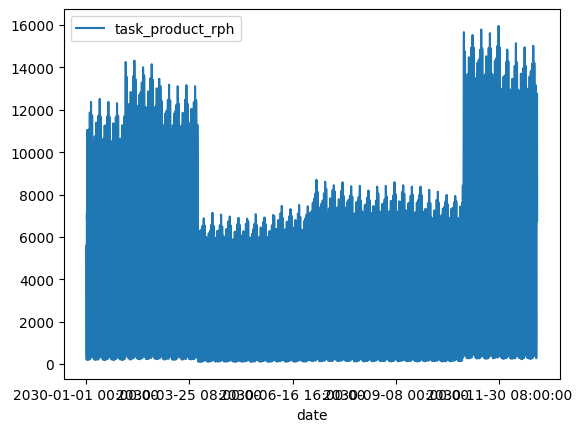

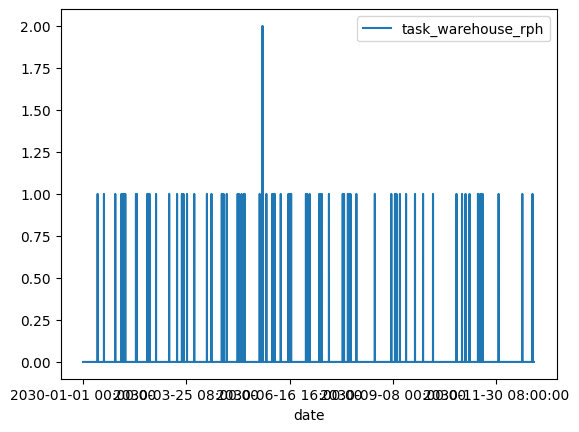

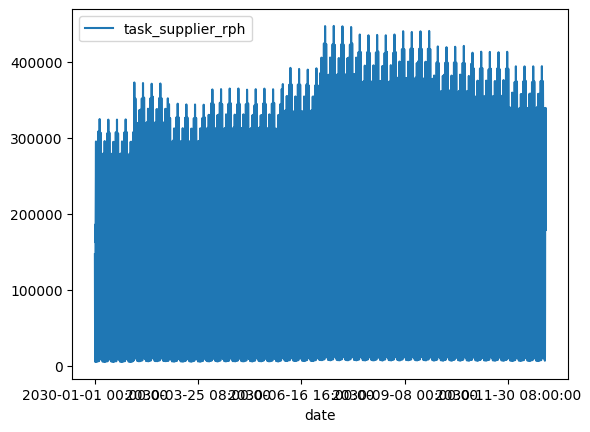

In [7]:

# Connect to Redis
r = redis.Redis(host='localhost', port=6379, db=0)

# Read the value of the key
value = r.get('plantd:advanced_trafficmodel_predictions_max:traffic-model-nominal')

# Convert the value from bytes to string
value = value.decode('utf-8')

df = pd.read_csv(StringIO(value))

df.plot(x='date', y=['task_product_rph'])
df.plot(x='date', y=['task_warehouse_rph'])
df.plot(x='date', y=['task_supplier_rph'])

In [10]:
# now load in plantd:temp:experiment_cr:test-pipeline.sc-warehouse
value = r.get('plantd:temp:experiment_cr:test-pipeline.sc-warehouse')
value = value.decode('utf-8')
value

'{"experiment_name": "test-pipeline.sc-warehouse", "start_time": "2024-04-09T16:58:46+00:00", "end_time": "2024-04-09T17:08:46+00:00", "duration": 600.0, "load_pattern_names": {"upload": "test-pipeline.five-minute-rampup-to-72"}, "pipeline_name": "test-pipeline.sample-pipeline", "load_patterns": {"upload": {"load_pattern_name": "test-pipeline.five-minute-rampup-to-72", "spec": {"maxVUs": 100, "preAllocatedVUs": 30, "stages": [{"duration": "600s", "target": 72}], "startRate": 0, "timeUnit": "1s"}, "total_duration": 600.0, "total_records": 21600.0}}, "pipeline": null, "metrics": "time,extract_phase,extract_phase_latency,load_phase,load_phase_latency,transform_phase,transform_phase_latency\\n2024-04-09 16:59:16,0.0,,0.0,,0.0,\\n2024-04-09 16:59:46,2.466666666666667,3.759036216224116,4.533333333333333,11.187534455894768,6.4,160.69103567708711\\n2024-04-09 17:00:16,6.066666666666666,4.430095296703628,11.733333333333333,10.528982835226502,17.0,62.023195678426646\\n2024-04-09 17:00:46,9.66666

In [12]:
value = r.get("plantd:temp:experiment_loadpatterns:test-pipeline.sc-warehouse")
value = value.decode('utf-8')
value

'{"upload": {"load_pattern_name": "test-pipeline.five-minute-rampup-to-72", "spec": {"maxVUs": 100, "preAllocatedVUs": 30, "stages": [{"duration": "600s", "target": 72}], "startRate": 0, "timeUnit": "1s"}, "total_duration": 600.0, "total_records": 21600.0}}'

In [13]:
r.get("plantd:temp:experiment_loadpatterns:test-pipeline.sc-warehouse").decode('utf-8')

'{"upload": {"load_pattern_name": "test-pipeline.five-minute-rampup-to-72", "spec": {"maxVUs": 100, "preAllocatedVUs": 30, "stages": [{"duration": "600s", "target": 72}], "startRate": 0, "timeUnit": "1s"}, "total_duration": 600.0, "total_records": 21600.0}}'

Index(['time', 'extract_phase', 'extract_phase_latency', 'load_phase',
       'load_phase_latency', 'transform_phase', 'transform_phase_latency'],
      dtype='object')


<AxesSubplot: xlabel='time'>

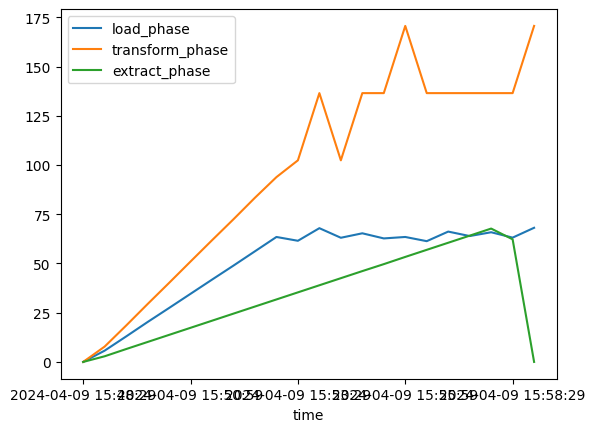

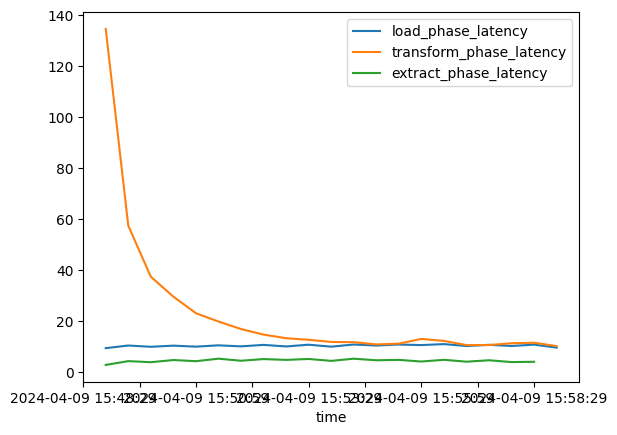

In [27]:
value = r.get("plantd:metrics:test-pipeline.sc-product").decode('utf-8')
df = pd.read_csv(StringIO(value))
print(df.columns)
df.plot(x='time', y=['load_phase', 'transform_phase', 'extract_phase'])
df.plot(x='time', y=['load_phase_latency', 'transform_phase_latency', 'extract_phase_latency'])

In [30]:
df

,time,extract_phase,extract_phase_latency,load_phase,load_phase_latency,transform_phase,transform_phase_latency
0,2024-04-09 15:59:41,0.000000,NaN,68.266667,9.628787,0.000000,NaN
1,2024-04-09 16:00:11,3.066667,6.927705,63.866667,10.692231,8.400000,125.488460
2,2024-04-09 16:00:41,6.666667,4.883745,67.533333,10.015149,19.200000,55.814272
3,2024-04-09 16:01:11,10.333333,5.062089,67.666667,9.998707,30.000000,37.533835
4,2024-04-09 16:01:41,13.933333,5.056661,62.333333,10.967794,40.800000,28.337265
5,2024-04-09 16:02:11,17.533333,5.005364,60.000000,11.409681,51.666667,23.199675
6,2024-04-09 16:02:41,21.066667,5.540168,63.800000,10.751914,62.533333,19.382073
7,2024-04-09 16:03:11,24.666667,4.933080,65.533333,10.423378,73.200000,17.130209
8,2024-04-09 16:03:41,28.333333,4.705906,55.666667,10.916030,84.200000,15.589890
9,2024-04-09 16:04:11,31.933333,5.170501,58.000000,11.775894,94.933333,14.496570


<AxesSubplot: xlabel='time'>

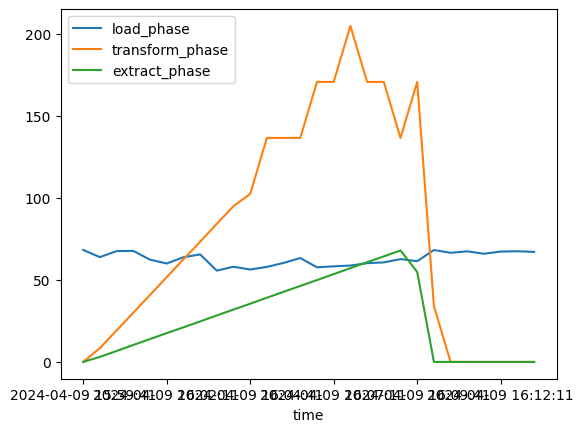

In [29]:
df = pd.read_csv(StringIO(r.get("plantd:metrics:test-pipeline.sc-supplier").decode('utf-8')))
df.plot(x='time', y=['load_phase', 'transform_phase', 'extract_phase'])